In [1]:
import math

In [2]:
class LIF():

    def __init__(self, I, total_time_ms, delta_t_ms,treshold, u_rest, start_u, u_reset, R, tau):
        self.I = I
        self.total_time_ms = total_time_ms
        self.delta_t_ms = delta_t_ms
        self.u_history = []
        self.fire_time_history = []
        self.u = start_u
        self.start_u = start_u
        self.treshold = treshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R = R
        self.tau = tau

    def start(self):
        current_time = 0
        while True:    
            du = (self.u_rest - self.u + self.R * self.I(current_time)/ 1000) / self.tau
            self.u += du * self.delta_t_ms
            if self.u >= self.treshold:
                self.fire_time_history.append(current_time)
                self.u = self.u_reset
            self.u_history.append(self.u)
            current_time += self.delta_t_ms
            if current_time > self.total_time_ms:
                break
        return self.u_history

## u-t plot ##

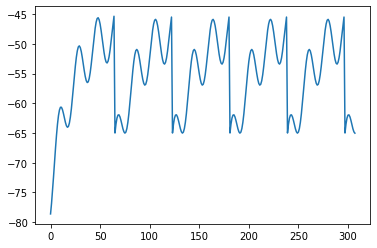

In [3]:
import matplotlib.pyplot as plt

def I(x):
  return 3500 * (math.sin(x) + 0.94)

lif = LIF(I, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.325)
lif.start()
plt.plot(range(len(lif.u_history)), lif.u_history)
plt.show()

## random input current ##

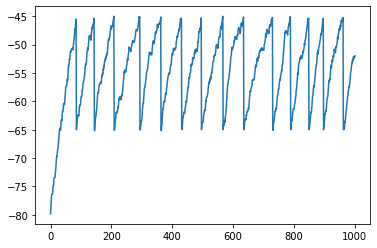

In [4]:
import random

def I(x):
  return random.random() * 10000

lif = LIF(I, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1)
lif.start()
plt.plot(range(len(lif.u_history)), lif.u_history)
plt.show()

## F-I plot ##

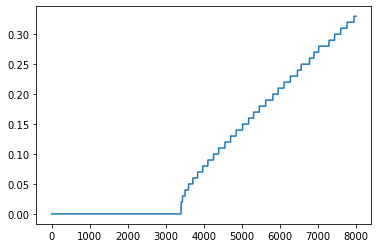

In [5]:
ferq = []
for i in range(0, 8000):
  Ii = lambda x: i
  lif = LIF(I=Ii, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1)
  lif.start()
  ferq.append(len(lif.fire_time_history)/lif.total_time_ms)
plt.plot(range(len(ferq)), ferq)
plt.show()

# ELIF #

In [6]:
class ELIF():

    def __init__(self, I, total_time_ms, delta_t_ms,treshold, u_rest, start_u, u_reset, R, tau, delta_T, theta_r_h):
        self.I = I
        self.total_time_ms = total_time_ms
        self.delta_t_ms = delta_t_ms
        self.u_history = []
        self.fire_time_history = []
        self.u = start_u
        self.start_u = start_u
        self.treshold = treshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R = R
        self.tau = tau
        self.delta_T = delta_T
        self.theta_r_h = theta_r_h

    def start(self):
        current_time = 0
        while True:    
            du = (self.u_rest - self.u + self.delta_T * math.exp((self.u - self.theta_r_h)/self.delta_T) + self.R * self.I(current_time)/ 1000) / self.tau
            self.u += du * self.delta_t_ms
            if self.u >= self.treshold:
                self.fire_time_history.append(current_time)
                self.u = self.u_reset
            self.u_history.append(self.u)
            current_time += self.delta_t_ms
            if current_time > self.total_time_ms:
                break
        return self.u_history

## u-t plot ##

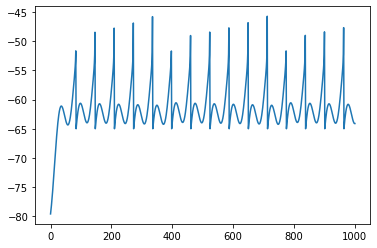

In [7]:
def I(x):
  return 3500 * (math.sin(x) + 0.94)

exlif = ELIF(I, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1, delta_T=1, theta_r_h=-58)
exlif.start()
plt.plot(range(len(exlif.u_history)), exlif.u_history)
plt.show()

## random input current ##

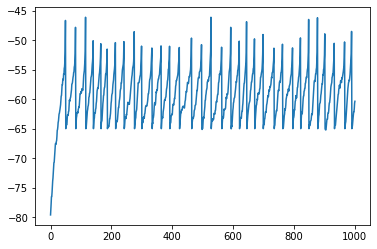

In [8]:
def I(x):
  return random.random() * 10000

exlif = ELIF(I, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1, delta_T=1, theta_r_h=-58)
exlif.start()
plt.plot(range(len(exlif.u_history)), exlif.u_history)
plt.show()

## F-I plot ##

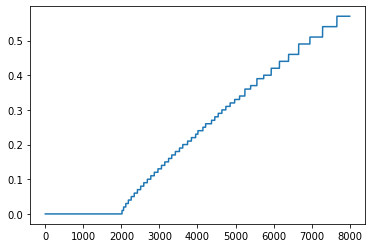

In [9]:
ferq = []
for i in range(0, 8000):
  Ii = lambda x: i
  exlif =  ELIF(Ii, treshold=-45, u_rest=-79, u_reset=-65, start_u=-80, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1, delta_T=1, theta_r_h=-58)
  exlif.start()
  ferq.append(len(exlif.fire_time_history)/exlif.total_time_ms)
plt.plot(range(len(ferq)), ferq)
plt.show()

# AELIF #

In [10]:
class AELIF():

    def __init__(self, I, total_time_ms, delta_t_ms,treshold, u_rest, start_u, u_reset, R, tau, delta_T, theta_r_h, a, b, tau_w):
        self.I = I
        self.total_time_ms = total_time_ms
        self.delta_t_ms = delta_t_ms
        self.u_history = []
        self.w_history = []
        self.fire_time_history = []
        self.u = start_u
        self.start_u = start_u
        self.treshold = treshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R = R
        self.tau = tau
        self.delta_T = delta_T
        self.theta_r_h = theta_r_h
        self.a = a
        self.b = b
        self.tau_w = tau_w
        self.w = 0

    def start(self):
        current_time = 0
        while True:    
            dw = ((self.a * (self.u - self.u_rest)) - self.w) / self.tau_w + self.b * len(self.fire_time_history)
            self.w += dw * self.delta_t_ms
            du = (self.u_rest - self.u + self.delta_T * math.exp((self.u - self.theta_r_h)/self.delta_T) - self.R * self.w / 1000 + self.R * self.I(current_time)/ 1000) / self.tau
            self.u += du * self.delta_t_ms
            if self.u >= self.treshold:
                self.u = self.u_reset
                self.fire_time_history.append(current_time)
            self.u_history.append(self.u)
            self.w_history.append(self.w)
            current_time += self.delta_t_ms
            if current_time > self.total_time_ms:
                break
        return self.u_history

## u-t plot ##

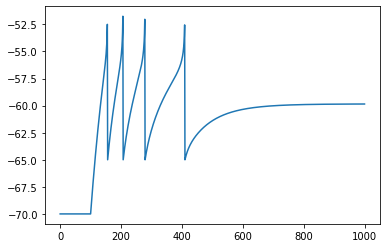

In [11]:
def I(x):
    if x <= 10:
        return 0
    return 3000

aelif = AELIF(I=I, treshold=-50, u_rest=-70, start_u=-70, u_reset=-65, R=10, tau=8, total_time_ms=100, delta_t_ms=0.1, 
    delta_T=1, theta_r_h=-58,
     a=0.01, b=500, tau_w=1)
aelif.start()
plt.plot(range(len(aelif.u_history)), aelif.u_history)
plt.show()

## w-t plot ##

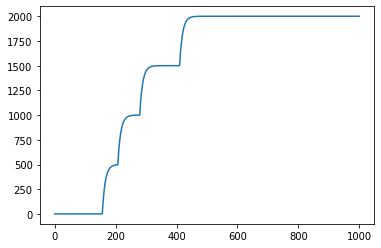

In [12]:
plt.plot(range(len(aelif.w_history)), aelif.w_history)
plt.show()